# Assignment 1 -  probability of getting head, μ, of a biased coin.

## Importing Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import gif
from IPython.display import Image

## Maximum Likelihood Estimator & Dataset

In [21]:
# dataset of size = 160
size = 160
# randomly generaing max likelihood estimator
uml = np.random.rand()
# to ensure max likelihood estimator does not fall in the range [0.4, 0.6]
while uml >= 0.4 and uml <= 0.6:
    uml = np.random.rand()
# randomly generating a dataset of 160 coin tosses
data = np.random.choice([0, 1], size=size, p=[1 - uml, uml])
unique, counts = np.unique(data, return_counts = True)
uml = counts[1] / 160

In [22]:
print(f"µml = {uml}")

µml = 0.35


-------------------------------------------------------------------------------------------------------------------------------

## Prior Distribution

$$p(𝜇| 𝑎, 𝑏) = 𝐵𝑒𝑡𝑎(𝜇| 𝑎, 𝑏) = \frac{𝛤(𝑎 + 𝑏)}{{𝛤(𝑎)}{𝛤(𝑏)}}  𝜇 ^{𝑎−1}  (1 − 𝜇) ^{𝑏−1}$$

$$E[µ] = \frac{a}{a + b} $$

__Given, $E[µ] = 0.4$. Therefore, $a = \frac{2}{3} b$. The values of $a$ and $b$ are taken as $2$ and $3$ respectively.__

### Plotting Prior Distribution

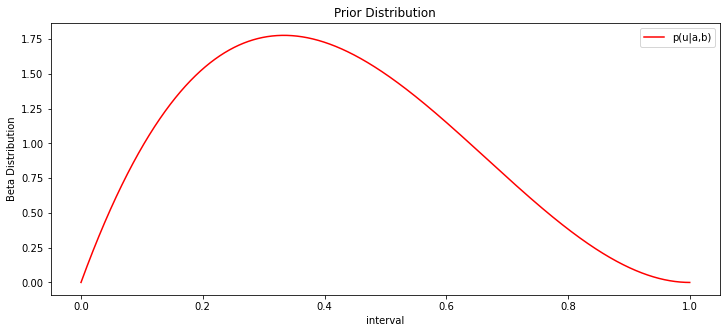

In [23]:
# Assumed hyperparameters of Beta Distribution
a , b = 2, 3
# interval between 0 & 1
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel("Beta Distribution")
ax.set_xlabel("interval")
ax.set_title("Prior Distribution")
ax.plot(x, beta.pdf(x, a, b), color = "red", label="p(u|a,b)")
ax.figure.savefig("prior_distribution.jpeg")
ax.legend();

-------------------------------------------------------------------------------------------------------------------------------

## Posterior Distribution

$$p(µ|m, l, a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} µ^{m+a−1}(1 − µ)^{l+b−1}$$

$$E[µ] = \frac{a + m}{a + m + b + l} $$

where $m$ = number of heads in the dataset. $l$ = number of tails in the dataset = size of dataset - $m$ = 160 - $m$.

### I. Sequential Learning Approach

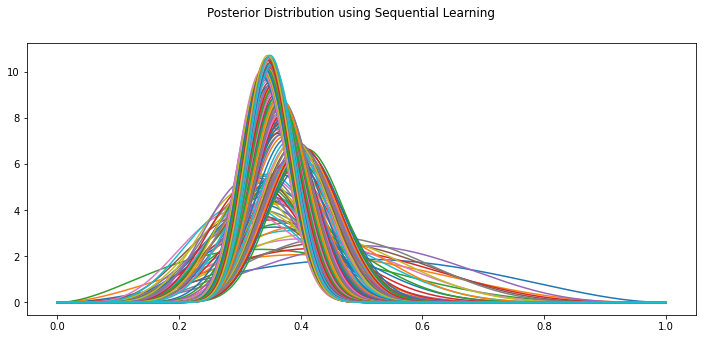

In [24]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Posterior Distribution using Sequential Learning')
ax = fig.add_subplot(1, 1, 1)
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    ax.plot(x, beta.pdf(x, a+m, b+l));
ax.figure.savefig("posterior_distribution.jpeg")

### Converting Sequential Plots into GIF: Evolution of Posterior

In [27]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
@gif.frame
def plot(a, b, m, l):
    y = beta.pdf(x, a + m, b + l)
    plt.plot(x, y)
    plt.xlim((0, 1))

In [28]:
frames = []
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    frame = plot(a, b, m, l)
    frames.append(frame)

In [29]:
gif.save(frames, 'sequential_training.gif', duration=100, unit="ms", loop=True, between="frames")

### II. Using Entire Dataset

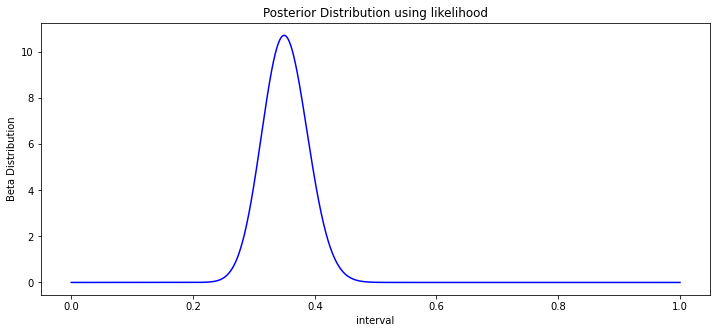

In [30]:
# Hyperparameters of the prior
a , b = 2, 3
# information from the dataset
m, l = counts[1], counts[0]
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Posterior Distribution using likelihood")
ax.set_xlabel("interval")
ax.set_ylabel("Beta Distribution")
ax.plot(x, beta.pdf(x, a + m, b + l), color = "blue");
ax.figure.savefig("posterior_final.jpeg")